In [74]:
import pandas as pd

df = pd.read_csv("./data/stj_sts.csv")
df.head()

,sentence_A,sentence_B,score,range,SPLIT
0,ADMINISTRATIVO. RECURSO ORDINÁRIO EM MANDADO D...,ADMINISTRATIVO. RECURSO ORDINÁRIO EM MANDADO D...,4.676405,4,TRAIN
1,ADMINISTRATIVO. AGRAVO REGIMENTAL. RECURSO ORD...,ADMINISTRATIVO E PROCESSUAL CIVIL. SEGUNDOS EM...,4.540016,4,TEST
2,ADMINISTRATIVO. RECURSO ORDINÁRIO EM MANDADO D...,ADMINISTRATIVO E PROCESSUAL CIVIL. SEGUNDOS EM...,4.597874,4,TRAIN
3,ADMINISTRATIVO. AGRAVO REGIMENTAL. RECURSO ORD...,ADMINISTRATIVO. RECURSO ORDINÁRIO EM MANDADO D...,4.724089,4,TEST
4,ADMINISTRATIVO E PROCESSUAL CIVIL. SEGUNDOS EM...,ADMINISTRATIVO. RECURSO ORDINÁRIO EM MANDADO D...,4.686756,4,TRAIN


In [2]:
from evaluate import load
bertscore = load("bertscore")


/home/jayr/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [75]:
test = df[df["SPLIT"] == "TEST"]
test.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 10814 entries, 1 to 51424
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sentence_A  10814 non-null  object 
 1   sentence_B  10814 non-null  object 
 2   score       10814 non-null  float64
 3   range       10814 non-null  int64  
 4   SPLIT       10814 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 506.9+ KB


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

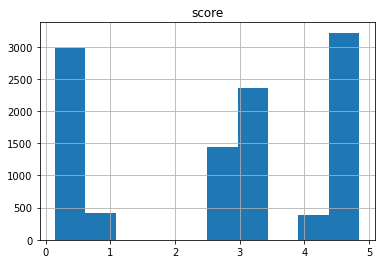

In [76]:
# histogram for score

test.hist("score")

In [77]:
# make a stratified sample of 50 rows. Uses the score column to stratify. Consider the score is a float

bins = [0, 1, 2, 3, 4, 5]
test['bin'] = pd.cut(test['score'], bins=bins)

# Determine the number of samples per bin
total_samples = 100
bin_counts = test['bin'].value_counts(normalize=True).sort_index()
samples_per_bin = (bin_counts * total_samples).round().astype(int)

# Adjust for rounding issues
samples_per_bin.iloc[-1] += total_samples - samples_per_bin.sum()

# Perform stratified sampling based on the bins
stratified_sample = test.groupby('bin', group_keys=False).apply(lambda x: x.sample(n=samples_per_bin.loc[x.name]))

# Drop the 'bin' column as it was just for stratification
stratified_sample = stratified_sample.drop(columns=['bin'])

stratified_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 17643 to 16190
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sentence_A  100 non-null    object 
 1   sentence_B  100 non-null    object 
 2   score       100 non-null    float64
 3   range       100 non-null    int64  
 4   SPLIT       100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


/tmp/ipykernel_210545/2323327553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['bin'] = pd.cut(test['score'], bins=bins)
/tmp/ipykernel_210545/2323327553.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = test.groupby('bin', group_keys=False).apply(lambda x: x.sample(n=samples_per_bin.loc[x.name]))
/tmp/ipykernel_210545/2323327553.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the oper

array([[<AxesSubplot:title={'center':'range'}>]], dtype=object)

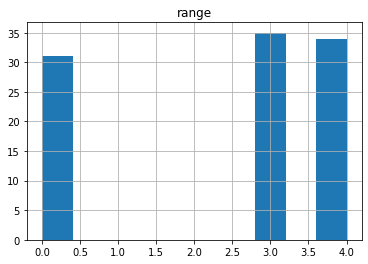

In [83]:
stratified_sample.hist("range")

In [80]:
# shuffle the rows
stratified_sample = stratified_sample.sample(frac=1).reset_index(drop=True)

In [81]:
stratified_sample.head(50)

,sentence_A,sentence_B,score,range,SPLIT
0,ADMINISTRATIVO. AMBIENTAL. AÇÃO CIVIL PÚB...,RECURSO ESPECIAL. TRÁFICO TRANSNACIONAL DE D...,0.509702,0,TEST
1,MANDADO DE SEGURANÇA. EX-SERVIDOR. PROCESSO AD...,MANDADO DE SEGURANÇA. INADEQUAÇÃO DA VIA ELEIT...,4.682618,4,TEST
2,PROCESSUAL CIVIL E ADMINISTRATIVO. MANDADO DE ...,HABEAS CORPUS. PROCESSO PENAL. ESTATUTO DA CRI...,0.502608,0,TEST
3,PROCESSO CIVIL. EMBARGOS DE DECLARAÇÃO. Omissã...,ADMINISTRATIVO. AGRAVO INTERNO NO RECURSO O...,3.015255,3,TEST
4,ADMINISTRATIVO E PROCESSUAL CIVIL. DESAPROPRIA...,PROCESSUAL CIVIL. FUNDAMENTO NÃO IMPUGNADO. SÚ...,3.097988,3,TEST
5,AGRAVO REGIMENTAL EM CONFLITO DE COMPETÊNCIA. ...,PROCESSO CIVIL. AGRAVO REGIMENTAL NO CONFLITO ...,4.450130,4,TEST
6,EMBARGOS DE DECLARAÇÃO RECEBIDOS COMO AGRAVO...,EXECUÇÃO. EMBARGOS DE TERCEIRO. IMPEN...,3.157499,3,TEST
7,AGRAVO INTERNO NO AGRAVO EM RECURSO ESPEC...,PROCESSUAL CIVIL. AGRAVO INTERNO NO AGRAVO EM ...,2.983173,3,TEST
8,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,PENAL. AGRAVO REGIMENTAL EM RECURSO ESPECI...,0.331340,0,TEST
9,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECURSO...,0.479354,0,TEST


In [82]:
stratified_sample.to_csv("./data/sample.csv", index=False)

In [41]:
references = stratified_sample["sentence_A"].values
predictions = stratified_sample["sentence_B"].values

In [42]:
results = bertscore.compute(predictions=predictions, references=references, lang="en",show_progress=True)

In [7]:
results

{'precision': [0.8207067251205444,
  0.885125994682312,
  0.8431960344314575,
  0.8172149062156677,
  0.8463836908340454,
  0.8470879197120667,
  0.8280817866325378,
  0.8383252024650574,
  0.8346685171127319,
  0.8314874768257141,
  0.8486172556877136,
  0.8288367390632629,
  0.8664535880088806,
  0.8372492790222168,
  0.8573464751243591,
  0.8286499381065369,
  0.8373159170150757,
  0.8578878045082092,
  0.8439999222755432,
  0.8378143906593323],
 'recall': [0.815623939037323,
  0.8924576044082642,
  0.7884061336517334,
  0.7950211763381958,
  0.8360767960548401,
  0.8029350638389587,
  0.7654871344566345,
  0.8260306715965271,
  0.8307565450668335,
  0.8263407945632935,
  0.8367154598236084,
  0.8259488344192505,
  0.8674034476280212,
  0.8325390219688416,
  0.8492498397827148,
  0.8277750611305237,
  0.840265154838562,
  0.8407460451126099,
  0.8684128522872925,
  0.8369005918502808],
 'f1': [0.8181574940681458,
  0.8887767195701599,
  0.8148811459541321,
  0.8059653043746948,
  0.

In [8]:
from utils import calculate_correlation

In [53]:
human_scores = stratified_sample["score"].values
pred_scores = results["precision"]

calculate_correlation(human_scores, pred_scores, {})

{'pearson': 0.31560791545486144,
 'spearman': 0.4060024009603841,
 'kendalltau': 0.29959183673469386}

In [54]:
import pandas as pd

df = pd.read_csv("data/jurisprudencias_stj.csv")

In [55]:
df.head()

,Unnamed: 0,MATERIA,NATUREZA,TEMA,PROCESSO,RELATOR,ORGAO,DATA_JULGAMENTO,DATA_PUBLICACAO,EMENTA
0,0,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,AgRg no AREsp 331607 / SP\nAGRAVO REGIMENTAL N...,Relator(a)\nMinistro HERMAN BENJAMIN (1132),T2 - SEGUNDA TURMA,15/08/2013,16/09/2013,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...
1,1,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,RMS 31995 / RS\nRECURSO ORDINÁRIO EM MANDADO D...,Relator(a)\nMinistro SÉRGIO KUKINA (1155),T1 - PRIMEIRA TURMA,15/08/2013,26/08/2013,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. ORD...
2,2,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,RMS 32169 / RN\nRECURSO ORDINÁRIO EM MANDADO D...,Relator(a)\nMinistro HUMBERTO MARTINS (1130),T2 - SEGUNDA TURMA,02/05/2013,17/06/2013,PROCESSUAL CIVIL E ADMINISTRATIVO. MANDADO DE ...
3,3,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,AgRg no REsp 1256653 / SP\nAGRAVO REGIMENTAL N...,Relator(a)\nMinistro BENEDITO GONÇALVES (1142),T1 - PRIMEIRA TURMA,28/08/2012,05/09/2012,PROCESSUAL CIVIL E ADMINISTRATIVO. AGRAVO REGI...
4,4,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,MS 15313 / DF\nMANDADO DE SEGURANÇA\n2010/0092...,Relator(a)\nMinistro MAURO CAMPBELL MARQUES (1...,S1 - PRIMEIRA SEÇÃO,09/11/2011,18/11/2011,ADMINISTRATIVO. MANDADO DE SEGURANÇA. SERVIDOR...


In [56]:
item = df.iloc[0]

In [60]:
print(item['PROCESSO'])

AgRg no AREsp 331607 / SP
AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIAL
2013/0131955-5


In [102]:
import pandas as pd

df = pd.read_json("results_legal_text_pt/stj_h_relevance_candidate.json")

df.head()

,Unnamed: 0,TEXT1,TEXT2,HEURISTIC_SCORE,EXPERT_SCORE,checklist,check_eval
0,34,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,4,1,# Checklist\n1: O texto discute um caso de agr...,{'relevance': 0.5714285714285711}
1,35,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,4,4,# Checklist\n1: O texto discute um caso de agr...,{'relevance': 0.5714285714285711}
2,36,AGRAVO REGIMENTAL NOS EMBARGOS DE DECLARAÇÃO N...,RECURSO ESPECIAL. CIVIL. INCORPORAÇÃO IMOBILIÁ...,2,3,# Checklist\n1: O texto trata de uma questão d...,{'relevance': 0.0}
3,37,DIREITO CIVIL E DO CONSUMIDOR. AGRAVO NO RECUR...,PENAL. HABEAS CORPUS SUBSTITUTIVO DE R...,0,0,# Checklist\n1: O texto discute a inaplicabili...,{'relevance': 0.0}
4,39,CIVIL E PROCESSUAL CIVIL. BANCÁRIO. AGRAVO REG...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,4,2,# Checklist\n1: O texto discute um caso relaci...,{'relevance': 0.33333333333333304}


In [103]:
# interate over "check_eval", json decode and get value for relevance
df["check_eval_score"] = df["check_eval"].apply(lambda x: x["relevance"])

df["combined_score_sum"] = df['HEURISTIC_SCORE'] + df['check_eval_score']

# normalize HEURISTIC_SCORE
df["HEURISTIC_SCORE_NORM"] = df["HEURISTIC_SCORE"] / df["HEURISTIC_SCORE"].max()
df["combined_norm"] = (df['HEURISTIC_SCORE_NORM'] + df['check_eval_score']) / 2

df.head()

,Unnamed: 0,TEXT1,TEXT2,HEURISTIC_SCORE,EXPERT_SCORE,checklist,check_eval,check_eval_score,combined_score_sum,HEURISTIC_SCORE_NORM,combined_norm
0,34,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,4,1,# Checklist\n1: O texto discute um caso de agr...,{'relevance': 0.5714285714285711},0.571429,4.571429,1.0,0.785714
1,35,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,4,4,# Checklist\n1: O texto discute um caso de agr...,{'relevance': 0.5714285714285711},0.571429,4.571429,1.0,0.785714
2,36,AGRAVO REGIMENTAL NOS EMBARGOS DE DECLARAÇÃO N...,RECURSO ESPECIAL. CIVIL. INCORPORAÇÃO IMOBILIÁ...,2,3,# Checklist\n1: O texto trata de uma questão d...,{'relevance': 0.0},0.000000,2.000000,0.5,0.250000
3,37,DIREITO CIVIL E DO CONSUMIDOR. AGRAVO NO RECUR...,PENAL. HABEAS CORPUS SUBSTITUTIVO DE R...,0,0,# Checklist\n1: O texto discute a inaplicabili...,{'relevance': 0.0},0.000000,0.000000,0.0,0.000000
4,39,CIVIL E PROCESSUAL CIVIL. BANCÁRIO. AGRAVO REG...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,4,2,# Checklist\n1: O texto discute um caso relaci...,{'relevance': 0.33333333333333304},0.333333,4.333333,1.0,0.666667
